<a href="https://colab.research.google.com/github/tohnperfect/mini_DPDM_KKU/blob/main/Copy_of_Data_Preprocessing_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview

*   Connect with Google Drive
*   Package loading
*   Load Data
*   Playing with Data
*   Data Preparation
    *   Handling Missing Data
    *   Remove Outlier
    *   ~Remove Correlate Column~
    *   Data Integration
    *   GroupBy






# Connect with Google Drive

!gdown --id 1g8pXciJK1l-4FCdEj9nQt10CyupZ6jXx

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Data for mini DPDM'

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/Data for mini DPDM'

metadata.xlsx  search_click.csv  w_restaurant.csv


# First, we have to say which packages we are going to use by `import` them.

In [3]:
import pandas
import os

### Create path variables to store where is the data files

In [4]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

# use `pandas` to load the data into the environment

In [5]:
search_click_df = pandas.read_csv(search_click)

In [6]:
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False


In [7]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [8]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


### Let's understand the data

### To check the dimension of loaded data

In [9]:
w_restaurant_df.shape

(246847, 32)

In [10]:
search_click_df.shape

(1048575, 6)

# Playing with Data

### Select column

In [13]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [14]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


### Select a value

In [15]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

### using `iloc`

In [ ]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [16]:
search_click_df.iloc[:10,:2]

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


### use logic

In [ ]:
w_restaurant_df[w_restaurant_df['city_name']=='Khon Kaen']

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
81,149,WISH CLINIC,2,0,Khon Kaen,NaN,w6cj7qn,0,5.000000,NaN,3.0,3,0,727,0,0,8,Whitening,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,11.0,NaN,NaN,NaN,NaN
317,614,Pomodoro,1,0,Khon Kaen,40000,w6cj7yz,0,4.078176,NaN,163.0,31,2,16055,15,0,3,Italian,3.0,NaN,3.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,710,ครัวอรวรรณ,1,0,Khon Kaen,NaN,w6cjg8m,0,4.000000,NaN,4.0,1,0,4568,1,0,1,Quick Meal,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN
452,805,วาสนาเคียมห้วย,1,0,Khon Kaen,40140,w6cphd9,0,4.000000,NaN,4.0,1,1,2465,1,0,7,Thai,2.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
514,885,ส้มตำศิริพร,1,0,Khon Kaen,40000,w6cjev6,0,4.000000,NaN,NaN,1,0,311,0,0,0,North East,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246312,339286,สเวนเซ่นส์ เซ็นทรัลพลาซ่า ขอนแก่น,1,0,Khon Kaen,40000,w6cj7z7,0,3.209524,258.0,4.0,7,4,2909,15,0,0,Ice Cream,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN
246335,339311,คิดถึงเบเกอรี่,1,0,Khon Kaen,40000,w6cjkj3,0,4.000000,NaN,1.0,1,0,1175,0,0,0,Bakery/Cake,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246638,339659,Firehaus Bistro,1,0,Khon Kaen,40000,w6cjebn,0,2.177778,NaN,9.0,4,0,2938,3,0,1,Steak House/Barbeque,2.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246748,339857,ร้านป้าจ่อย,1,0,Khon Kaen,40150,w6bvf38,0,0.000000,NaN,NaN,0,0,207,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ==, !=, >, <, >=, <=, &, |

In [20]:
w_restaurant_df[(w_restaurant_df['weighted_average_rating']>4) & (w_restaurant_df['city_name']=='Khon Kaen')]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
81,149,WISH CLINIC,2,0,Khon Kaen,NaN,w6cj7qn,0,5.000000,NaN,3.0,3,0,727,0,0,8,Whitening,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,11.0,NaN,NaN,NaN,NaN
317,614,Pomodoro,1,0,Khon Kaen,40000,w6cj7yz,0,4.078176,NaN,163.0,31,2,16055,15,0,3,Italian,3.0,NaN,3.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,1545,สุโขทัยชวนชิม,1,0,Khon Kaen,40000,w6cj7cn,0,4.500000,NaN,2.0,2,0,266,1,0,0,Thai,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450,4346,บ้านสวนนารา,1,0,Khon Kaen,40000,w6cjdf1,0,4.441860,NaN,52.0,6,0,6176,3,0,0,Thai,2.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2758,4902,อ.กุ้งเผา,1,0,Khon Kaen,40270,w6bvxf6,0,5.000000,NaN,3.0,2,2,1575,0,0,0,Seafood,2.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245119,337963,เจ้แดง บ้านไผ่ บัวลอยไข่หวานทรงเครื่อง/ข้าวเหน...,1,0,Khon Kaen,40000,w6cjkn0,0,4.120567,NaN,26.0,10,1,1829,5,0,0,Dessert,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245298,338161,ครัวนภัสสร,1,0,Khon Kaen,40000,w6cjs15,0,5.000000,NaN,6.0,4,4,3417,6,0,27,North East,1.0,NaN,3.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245609,338518,ก๋วยเตี๋ยวเนื้อร้านป้าวิมล,1,0,Khon Kaen,40000,w6cjkh9,0,4.720000,NaN,9.0,4,1,919,5,0,0,Noodles,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245787,338717,ChitChat coffee&food,1,0,Khon Kaen,40000,w6cjeus,0,5.000000,NaN,1.0,0,0,181,0,0,0,Cafe,1.0,NaN,NaN,0.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### Important statistics

In [21]:
w_restaurant_df.describe()

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
count,246847.000000,246847.000000,246847.000000,246847.000000,246847.000000,16297.000000,146490.000000,246847.000000,246847.000000,2.468470e+05,246847.000000,246847.000000,246847.000000,180972.000000,4572.000000,139476.000000,92101.000000,51464.000000,46382.000000,35425.000000,678.000000,50538.000000,58067.000000,5487.000000,9917.000000,8337.000000,10051.000000
mean,179339.150458,1.116651,0.013826,0.047215,2.306552,128.770326,22.499993,3.812285,0.877661,2.391760e+03,2.715103,0.225678,2.254611,1.569740,327.447288,1.966503,0.279878,0.927736,0.910073,0.631729,1770.958702,0.739622,2.577144,0.337890,0.602602,0.149574,0.763407
std,95343.871375,0.450736,0.116770,0.212100,1.892845,177.460509,101.345339,14.079545,2.975925,9.663269e+03,9.973349,2.090574,8.889624,0.831197,323.017464,1.141263,0.448941,0.258927,0.286080,0.482342,661.926106,0.591486,2.202690,0.473034,0.489384,0.356675,0.425012
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101529.500000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,2.460000e+02,0.000000,0.000000,0.000000,1.000000,175.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2018.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,181785.000000,1.000000,0.000000,0.000000,3.000000,48.000000,3.000000,1.000000,0.000000,5.740000e+02,0.000000,0.000000,0.000000,1.000000,175.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,261324.500000,1.000000,0.000000,0.000000,4.000000,164.000000,10.000000,2.000000,1.000000,1.483000e+03,2.000000,0.000000,1.000000,2.000000,375.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
max,340091.000000,4.000000,1.000000,1.000000,5.583333,629.000000,4639.000000,786.000000,50.000000,1.059260e+06,1161.000000,217.000000,668.000000,5.000000,1500.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,2.000000,14.000000,1.000000,1.000000,1.000000,1.000000


### Sort by value in the column

In [23]:
w_restaurant_df.sort_values('weighted_average_rating')

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
58720,97728,ออริจินอลอิตาเลี่ยนพิซซ่า,1,0,Bangkok Metropolitan Region,10210,w4rqzry,0,0.000000,NaN,1.0,0,0,496,0,0,0,Pizza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73914,116510,เทรดการ์เด้น,1,0,Phuket,83130,w1mum4r,0,0.000000,NaN,NaN,0,0,75,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165044,235851,ครัวคุณแม่,1,0,Krabi,81000,w1qq434,0,0.000000,NaN,NaN,0,0,116,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73911,116507,Souluxe Massage,2,0,Bangkok Metropolitan Region,10110,w4rw0me,0,0.000000,NaN,NaN,0,0,224,0,0,0,Spa & Massage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73910,116506,ร้านอาหารอีสานต้นรัก (หินตา-หินยาย),1,0,Surat Thani,84140,w1xju3w,0,0.000000,NaN,NaN,0,0,178,0,0,0,North East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155835,224037,เฮือนบ่าวน้อย,1,0,Bangkok Metropolitan Region,10510,w4rwg7n,0,5.000000,NaN,9.0,2,0,1067,0,1,1,Northern Food,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
170989,243500,เย็นตาโฟฟ้าผ่าตลาดนัดเลียบด่วน,1,0,Bangkok Metropolitan Region,NaN,w4rw916,0,5.000000,NaN,1.0,1,1,412,0,0,0,Noodles,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68520,109995,หล่อซีเฮง กาแฟแก้วยักษ์,1,0,Bangkok Metropolitan Region,10530,w4rwyfk,0,5.000000,NaN,7.0,1,1,2844,0,0,0,Café/Coffee Shop,1.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN


In [25]:
w_restaurant_df[w_restaurant_df['city_name']=='Khon Kaen'].sort_values('weighted_average_rating',ascending=False)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
81,149,WISH CLINIC,2,0,Khon Kaen,NaN,w6cj7qn,0,5.0,NaN,3.0,3,0,727,0,0,8,Whitening,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,11.0,NaN,NaN,NaN,NaN
49055,85827,ร้านตัดผมคุณซี ผมชาย,2,0,Khon Kaen,40000,w6cjt0h,0,5.0,NaN,NaN,1,0,406,0,0,1,Man Hair Cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175393,248993,Sense Spa Cheewatip,2,0,Khon Kaen,40000,w6cj7zf,0,5.0,NaN,4.0,0,0,1926,0,0,0,Spa & Massage,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176314,250142,เตี๋ยวตุ๋นหม้อไฟ Indy,1,0,Khon Kaen,NaN,w6cjs71,0,5.0,NaN,NaN,1,0,325,0,0,1,Noodles,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN
37758,68767,ร้านมีออร่า,2,0,Khon Kaen,40000,w6cjs5u,0,5.0,NaN,8.0,7,0,2565,0,0,1,Hair Removal,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,139755,ไทบ้านไร่,1,0,Khon Kaen,40000,w6cjky7,0,0.0,NaN,1.0,0,0,106,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91069,140016,ร้านอาหารไก่ย่างทิวา,1,0,Khon Kaen,40140,w6cpus7,0,0.0,NaN,NaN,0,0,171,0,0,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153143,220606,ร้านก๋วยเตี๋ยวเป็ดมังกรทองบ้านคำไฮ,1,0,Khon Kaen,40000,w6cje2k,0,0.0,NaN,NaN,0,0,161,0,0,0,Noodles,3.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
153046,220489,Chakuma Ptt Banphai,1,0,Khon Kaen,NaN,w6c5984,0,0.0,NaN,1.0,0,2,630,1,0,0,Café/Coffee Shop,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


# Data Preparation

## Handling Missing Data


*   Delete
*   Replace with appropriate value
*   ~Replace with class value~



### Missing values

In [26]:
search_click_df.isnull()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [27]:
search_click_df.isnull().any()

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

## Delete missing records

In [28]:
search_click_df.dropna() ## view

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False


In [29]:
search_click_df_nm = search_click_df.dropna() ## value

In [30]:
search_click_df_nm

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False


In [31]:
search_click_df_nm.isnull().any()

click_timestamp     False
search_id           False
business_id         False
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

### Excercise 1 ตรวจสอบว่า การลบข้อมูล missing ออก

### จากตาราง w_restarant จะทำให้ข้อมูลลดลงกี่ %

In [32]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} \nsize after drop = {size_after_drop} \
    \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 
size after drop = 4     
which is 99.99837956304918


### Drop only the columns we are interested

In [33]:
w_restaurant_df.dropna(subset=['id','name','price_range'])

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
5,14,บ้านมุมสบาย,1,0,Chon Buri,NaN,w4rgsyz,0,5.000000,NaN,2.0,0,0,930,0,0,0,Thai,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,1.0,0.0,0.0,0.0
6,15,Hing Fat Resteurant,1,0,New Territories,NaN,wecny4b,0,3.000000,NaN,1.0,3,1,859,1,0,2,Noodles,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,Sazanami,1,0,Bangkok Metropolitan Region,10110,w4rw0sp,0,4.130435,NaN,97.0,6,0,10785,2,0,3,Japanese,4.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,NaN,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,NaN,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,NaN,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Replace with appropriate value

### with 1

In [34]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(1)

In [35]:
w_restaurant_df

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,1.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,1.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,1.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,1.0,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,1.0,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,1.0,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,1.0,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,1.0,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### with mean

In [36]:
avg_price = w_restaurant_df['avg_price'].mean()
avg_price

327.44728783902013

In [39]:
w_restaurant_df[['avg_price']] = w_restaurant_df[['avg_price']].fillna(avg_price)

In [40]:
w_restaurant_df

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,1.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,327.447288,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,1.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,327.447288,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,1.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,327.447288,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,1.0,NaN,0,0,901,0,0,0,Karaoke,NaN,327.447288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,1.0,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,327.447288,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,327.447288,3.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,1.0,1.0,0,0,537,1,0,0,Karaoke,1.0,327.447288,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,1.0,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,327.447288,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,1.0,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,327.447288,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove Outlier (with boxplot)
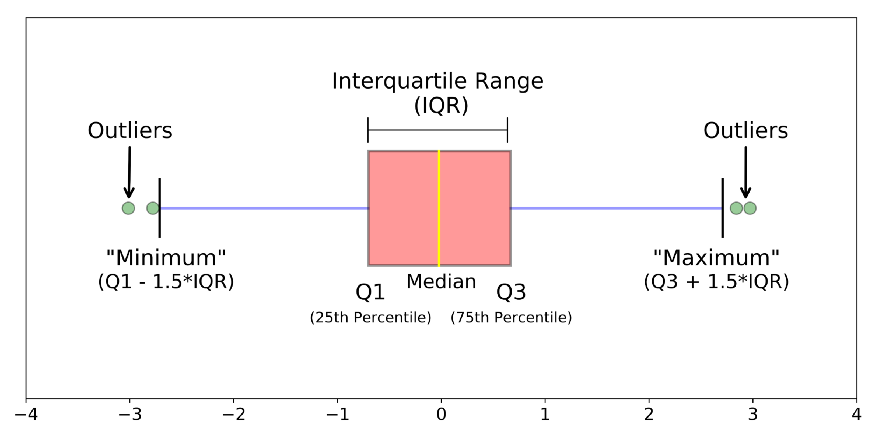

In [41]:
from matplotlib import pyplot as plt

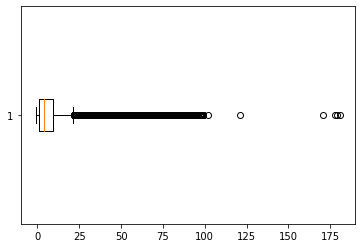

In [43]:
ret1 = plt.boxplot(search_click_df['display_position'],vert=False)

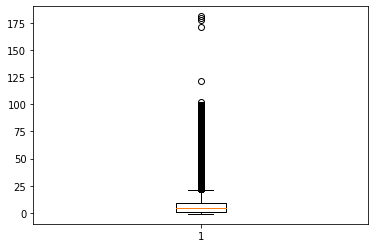

In [42]:
ret = plt.boxplot(search_click_df['display_position'])

In [ ]:
ret

{'boxes': [<matplotlib.lines.Line2D at 0x7f14fe6adc50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f14fe6be668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14fe6cb128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f14fe6bed68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f14fe6adf60>,
  <matplotlib.lines.Line2D at 0x7f14fe6be2e8>]}

In [44]:
print(ret['whiskers'][0].get_ydata()[1])
print(ret['whiskers'][1].get_ydata()[1])

-1.0
21.0


In [45]:
nooutlier_nomissing = search_click_df[search_click_df['display_position']>=ret['whiskers'][0].get_ydata()[1]]
nooutlier_nomissing = nooutlier_nomissing[nooutlier_nomissing['display_position']<=ret['whiskers'][1].get_ydata()[1]]
nooutlier_nomissing

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False


## Data Integration (combine 2 tables vs copy some columns from another table)

### merge two tables (.merge())

In [49]:
merged_table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id')
merged_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name,city,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight,Bangkok Metropolitan Region,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,327.447288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya,Bangkok Metropolitan Region,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,327.447288,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery,Bangkok Metropolitan Region,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,1.0,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,327.447288,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา,Bangkok Metropolitan Region,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,1.0,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,327.447288,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya,Bangkok Metropolitan Region,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,327.447288,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน,Chaiyaphum,278479.0,เสกแจ่วฮ้อน,1.0,0.0,Chaiyaphum,NaN,w6b9cyk,0.0,4.000000,1.0,3.0,2.0,2.0,1599.0,0.0,0.0,0.0,Sukiyaki/Shabu,1.0,327.447288,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา,Bangkok Metropolitan Region,321885.0,ก๋วยเตี๋ยวหมูหน่อกะลา,1.0,0.0,Bangkok Metropolitan Region,11120,w4rrppd,0.0,4.000000,1.0,7.0,2.0,1.0,956.0,1.0,0.0,0.0,Noodles,1.0,327.447288,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood,Bangkok Metropolitan Region,221035.0,Laemcharoen Seafood,1.0,0.0,Bangkok Metropolitan Region,12130,w4rx9de,0.0,3.830601,23.0,24.0,11.0,8.0,8977.0,7.0,8.0,4.0,Seafood,3.0,327.447288,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ,Bangkok Metropolitan Region,220572.0,เอี่ยวไถ่ สุกี้โบราณ,1.0,0.0,Bangkok Metropolitan Region,11130,w4rqtcb,0.0,3.766129,12.0,153.0,58.0,12.0,37940.0,78.0,0.0,29.0,Sukiyaki/Shabu,3.0,327.447288,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### copy a column from other table (.map())

In [50]:
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name,city
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight,Bangkok Metropolitan Region
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya,Bangkok Metropolitan Region
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery,Bangkok Metropolitan Region
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา,Bangkok Metropolitan Region
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya,Bangkok Metropolitan Region
...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน,Chaiyaphum
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา,Bangkok Metropolitan Region
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood,Bangkok Metropolitan Region
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ,Bangkok Metropolitan Region


In [51]:
search_click_df['city'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['city_name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name,city
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight,Bangkok Metropolitan Region
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya,Bangkok Metropolitan Region
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery,Bangkok Metropolitan Region
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา,Bangkok Metropolitan Region
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya,Bangkok Metropolitan Region
...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน,Chaiyaphum
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา,Bangkok Metropolitan Region
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood,Bangkok Metropolitan Region
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ,Bangkok Metropolitan Region


## Group data using `groupby()`

In [ ]:
search_click_df.groupby('business_id').count()

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name,city
business_id,,,,,,,
2.0,4,4,4,4,4,4,4
5.0,2,2,2,2,2,2,2
6.0,6,6,6,6,6,6,6
7.0,3,3,3,3,3,3,3
14.0,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
340060.0,4,4,4,4,4,4,4
340063.0,1,1,1,1,1,1,1
340067.0,2,2,2,2,2,2,2


In [53]:
search_click_df.groupby('business_id').count().sort_values('click_timestamp')

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name,city
business_id,,,,,,,
122473.0,1,1,1,1,1,1,1
136485.0,1,1,1,1,1,1,1
275120.0,1,1,1,1,1,1,1
136492.0,1,1,1,1,1,1,1
136498.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
150227.0,1377,1377,1377,1377,1377,1377,1377
273486.0,1417,1417,1417,1417,1417,1417,1417
112509.0,2130,2130,2130,2130,2130,2130,2130


In [54]:
w_restaurant_df[w_restaurant_df['id']==182530]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
124030,182530,หนานหยวน,1,0,Bangkok Metropolitan Region,10400,w4rw22m,0,4.083893,1.0,37.0,20,1,14200,11,0,10,Chinese,3.0,327.447288,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ex หาจังหวัดที่มีคน click เข้าไปมากที่สุดสามอันดับแรก

In [ ]:
search_click_df.groupby('city').count().sort_values('click_timestamp',ascending=False).iloc[:3,:]

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
city,,,,,,,
Bangkok Metropolitan Region,596980,596963,596980,596980,596980,596980,596980
Chiang Mai,56775,56775,56775,56775,56775,56775,56775
Chon Buri,51535,51535,51535,51535,51535,51535,51535


In [55]:
search_click_df.to_csv('search_click_mod.csv')

In [ ]:
se